# Team One: The Opioid Crisis in the United States

### Analysis
* OBSERVED TREND For Research Question 1: 
* OBSERVED TREND For Research Question 2: 
* OBSERVED TREND For Research Question 3: 
* OBSERVED TREND For Research Question 3: 


###### Development team notes and caveats:
* 

#### Dependencies

In [2]:
import os                                                                    # os library

In [3]:
import numpy as np                                                           # numpy library

In [4]:
import pandas as pd                                                          # pandas library

In [5]:
import matplotlib.pyplot as plt                                              # pyplot module from matplotlib library

In [6]:
import matplotlib.patches as mpatches                                        # patches module from matplotlib library

In [7]:
import seaborn as sns                                                        # seaborn library

In [9]:
from citipy import citipy                                                    # citipy module from citipy library

ModuleNotFoundError: No module named 'citipy'

In [10]:
import requests                                                              # requests library

In [11]:
from datetime import datetime                                                # datetime module from datetime library

In [12]:
import time                                                                  # time library, api call compliance

In [13]:
sns.set()                                                                    # switches to seaborn default display

#### Research Question 1

In [14]:
filename = 'Q1DS1.csv'                                                       # 1st data file for Q1

In [15]:
csv_file = os.path.join(".", "Data Files", filename)                         # creates path to read data

In [16]:
q1_df = pd.read_csv(csv_file, index_col="Year")                              # reads data from file

In [17]:
q1_df.head()                                                                 # displays dataframe

,Year Code,Deaths,Population,Crude Rate,Crude Rate Standard Error
Year,,,,,
1999,1999,5594,279040168,2.004729,0.0
2000,2000,6011,281421906,2.135939,0.0
2001,2001,7088,284968955,2.487288,0.0
2002,2002,9318,287625193,3.239633,0.0
2003,2003,10389,290107933,3.581081,0.0


In [18]:
year_min = q1_df.index.min()                                                 # finds min and max dates
year_max = q1_df.index.max()

In [19]:
plt.figure(figsize = (12,15))                                                # sets bar chart parameters
plt.title('Opioid Deaths By Year: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Deaths Per 100,000 Population', fontdict = {'fontsize': 16})

#xlabels = str(q1_df.index)
xvals = np.arange(len(q1_df))
tick_locations = [value+0.4 for value in xvals]

plt.bar(xvals, q1_df['Crude Rate'], color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1_df['Year Code'], rotation="horizontal")

([<matplotlib.axis.XTick at 0x110933f98>,
 <a list of 17 Text xticklabel objects>)

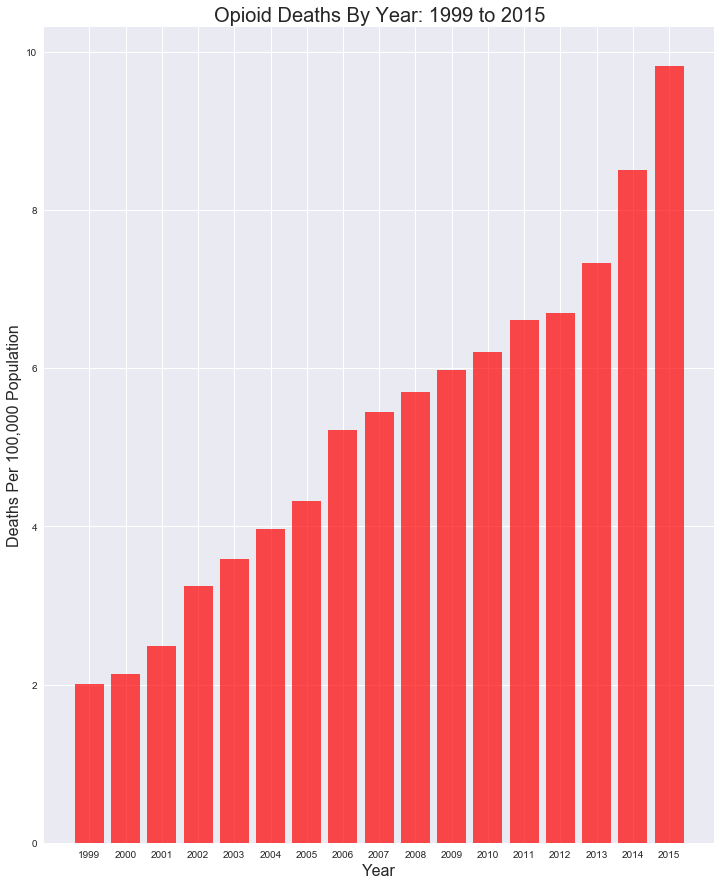

In [20]:
plt.show()                                                                   # displays plot

#### Research Question 2
#### Opioid Prescriber Rates

Change in Medicare Part D Opioid Prescribing Rates from 2013 to 2015 by State

In [21]:
# Took CMS Medicare Part D Opioid Prescribing Geographic 2013 2015 Excel file and created CSV files for the three taps 1) state 2) county and 3) zip
# Stored presciber-state file in a variable
prescriber_state = "Data Files/prescriber_state.csv"
prescriber_state_df = pd.read_csv(prescriber_state)
prescriber_state_df.head()

,State_Name,State_Abbreviation,State_FIPS,2013_Part_ D_Prescribers,2013_Part_Opioid_Prescribers,2013_Opioid Claims,2013_Extended_Release_Opioid_Claims,2013_Overall_Claims,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,...,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Part D Prescribers,2015_Part D Opioid Prescribers,2015_Opioid Claims,2015_Extended Release Opioid Claims,2015_Overall_Claims,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2013_2015_Change_in_Opioid_Prescribing_Rate,2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate
0,National,NaN,NaN,"1,037,770","491,500","78,045,683","4,773,286","1,342,096,654",5.82,6.12,...,6.27,"1,090,979","496,383","78,372,855","5,257,481","1,418,618,875",5.52,6.71,-0.30,0.59
1,Alabama,AL,1.0,"12,820","7,422","2,260,284","118,523","29,160,952",7.75,5.24,...,5.24,"13,492","6,980","2,179,506","121,061","28,898,258",7.54,5.55,-0.21,0.31
2,Alaska,AK,2.0,"2,275","1,099","86,517","8,602","1,281,057",6.75,9.94,...,10.44,"2,342","1,067","89,275","9,509","1,339,671",6.66,10.65,-0.09,0.71
3,Arizona,AZ,4.0,"20,542","10,510","1,545,138","151,086","22,126,421",6.98,9.78,...,9.78,"21,833","10,992","1,649,600","169,215","24,315,477",6.78,10.26,-0.20,0.48
4,Arkansas,AR,5.0,"7,909","4,700","1,128,356","57,519","16,759,116",6.73,5.10,...,5.17,"8,327","4,714","1,132,475","63,261","17,786,636",6.37,5.59,-0.36,0.49


In [22]:
#Selected the opioid prescribe rate columsn for years 2013-2015
prescriber_state_rate_df = prescriber_state_df[["State_Name","State_Abbreviation","2013_Opioid_Prescribing_Rate","2013_Extended_Release_Opioid_Prescribing_Rate","2014_Opioid_Prescribing_Rate","2014_Extended_Release_Opioid_Prescribing_Rate","2015_Opioid_Prescribing_Rate","2015_Extended_Release_Opioid_Prescribing_ Rate","2013_2015_Change_in_Opioid_Prescribing_Rate","2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate "]]
prescriber_state_df.fillna("National")
prescriber_state_df.head()

,State_Name,State_Abbreviation,State_FIPS,2013_Part_ D_Prescribers,2013_Part_Opioid_Prescribers,2013_Opioid Claims,2013_Extended_Release_Opioid_Claims,2013_Overall_Claims,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,...,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Part D Prescribers,2015_Part D Opioid Prescribers,2015_Opioid Claims,2015_Extended Release Opioid Claims,2015_Overall_Claims,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2013_2015_Change_in_Opioid_Prescribing_Rate,2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate
0,National,NaN,NaN,"1,037,770","491,500","78,045,683","4,773,286","1,342,096,654",5.82,6.12,...,6.27,"1,090,979","496,383","78,372,855","5,257,481","1,418,618,875",5.52,6.71,-0.30,0.59
1,Alabama,AL,1.0,"12,820","7,422","2,260,284","118,523","29,160,952",7.75,5.24,...,5.24,"13,492","6,980","2,179,506","121,061","28,898,258",7.54,5.55,-0.21,0.31
2,Alaska,AK,2.0,"2,275","1,099","86,517","8,602","1,281,057",6.75,9.94,...,10.44,"2,342","1,067","89,275","9,509","1,339,671",6.66,10.65,-0.09,0.71
3,Arizona,AZ,4.0,"20,542","10,510","1,545,138","151,086","22,126,421",6.98,9.78,...,9.78,"21,833","10,992","1,649,600","169,215","24,315,477",6.78,10.26,-0.20,0.48
4,Arkansas,AR,5.0,"7,909","4,700","1,128,356","57,519","16,759,116",6.73,5.10,...,5.17,"8,327","4,714","1,132,475","63,261","17,786,636",6.37,5.59,-0.36,0.49


In [25]:
#Selected the opioid prescribe rate columsn for years 2013-2015

prescriber_state_rate_changeex_df = prescriber_state_df[["State_Name","2013_2015_Change_in_Opioid_Prescribing_Rate", "2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate "]]
prescriber_state_rate_changeex_df.columns = ['State', 'Opioid', 'Extended Release']
prescriber_state_rate_changeex_df.set_index("State", inplace = True)
prescriber_state_rate_changeex_df.head()

prescriber_state_rate_change_za =prescriber_state_rate_changeex_df.sort_index(ascending=False)
prescriber_state_rate_change_za.head()

,Opioid,Extended Release
State,,
Wyoming,0.23,0.08
Wisconsin,-0.10,0.30
West Virginia,-0.73,0.33
Washington,-0.07,-0.05
Virginia,-0.41,0.45


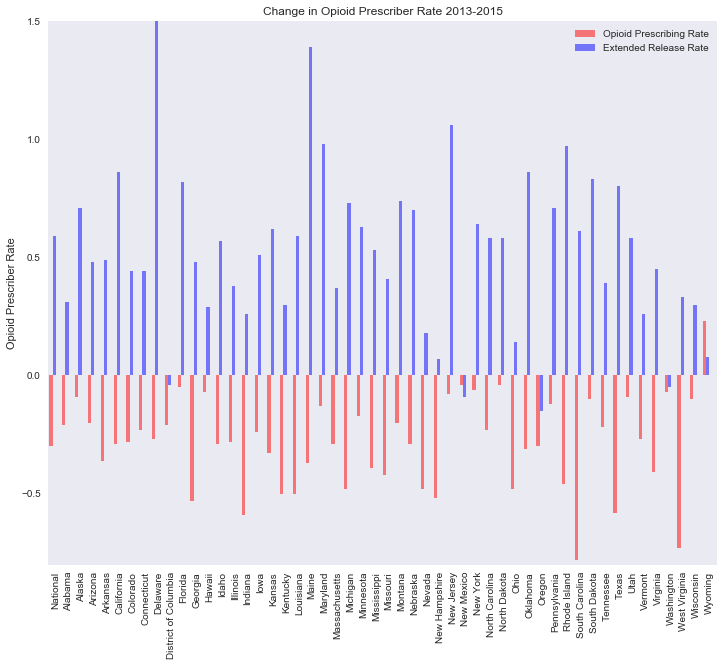

In [31]:
# Setting the positions and width for the bars
pos = list(range(len(prescriber_state_rate_df["State_Name"]))) 
width = 0.25 


# Plotting the bars
fig, ax = plt.subplots(figsize=(12,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
         
        prescriber_state_rate_changeex_df["Opioid"],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='r', 
        # with label the first value in first_name
        label=prescriber_state_rate_changeex_df["Opioid"][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        prescriber_state_rate_changeex_df["Extended Release"],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='b', 
        # with label the second value in first_name
        label= prescriber_state_rate_changeex_df["Extended Release"][1]) 

# Set the y axis label
ax.set_ylabel('Opioid Prescriber Rate')
#plt.ylabel("Prescribing Rate")

# Set the chart's title
ax.set_title("Change in Opioid Prescriber Rate 2013-2015", loc='center')
#plt.title("CMS Medicare Part D Opioid Prescribing Rates 2013-2015 by Sate")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(prescriber_state_rate_df["State_Name"], rotation = "vertical")
#plt.xlabel("State")



# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([-0.8, max( prescriber_state_rate_changeex_df["Opioid"] + prescriber_state_rate_changeex_df["Extended Release"])] )

# Adding the legend and showing the plot
plt.legend(['Opioid Prescribing Rate', 'Extended Release Rate'], loc='upper right')
plt.grid()
plt.show() # displays plot

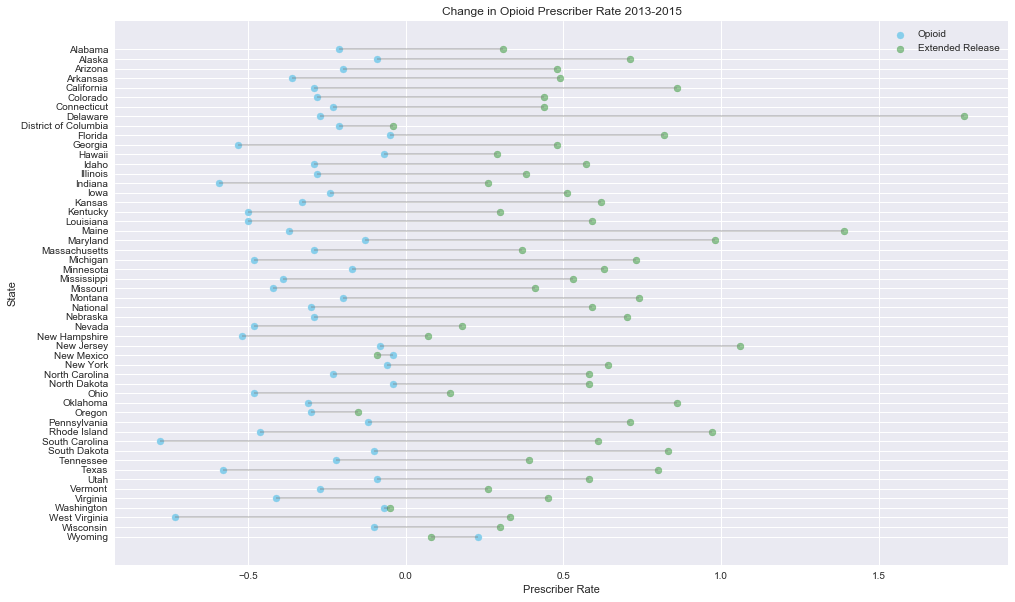

In [28]:
# Plot the lollipop plot
plt.figure(figsize=(16,10))
my_range=range(1,len(prescriber_state_rate_change_za.index)+1)
plt.hlines(y=my_range, xmin=prescriber_state_rate_change_za["Opioid"], xmax=prescriber_state_rate_change_za["Extended Release"], color='grey', alpha=0.4)
plt.scatter(prescriber_state_rate_change_za["Opioid"], my_range, color='skyblue', alpha=1, label='Opioid')
plt.scatter(prescriber_state_rate_change_za["Extended Release"], my_range, color='green', alpha=0.4 , label='Extended Release')
plt.legend()


# Add title and axis names
plt.yticks(my_range, prescriber_state_rate_change_za.index)
plt.title("Change in Opioid Prescriber Rate 2013-2015", loc='center')
plt.xlabel('Prescriber Rate')
plt.ylabel('State')

plt.show() # displays plot

#### Research Question 3
####  - Impact of the opioid epidemic
Are urban areas impacted more by the opioid epidemic? Scatterplot of Urban vs. not urban 

In [ ]:

# import datasets
csv_OpDeaths = r'Data Files/raw_data-KFF_opioid_death_csv.csv' 
csv_UrbPop = r'Data Files/pop-urban-pct-historical_cleaned_up.csv'

# Read in the csv files, skipping titles and footer notes
OpDeaths_df = pd.read_csv(csv_OpDeaths, engine='python', skiprows=[0, 1], skipfooter=13) 
UrbPop_df = pd.read_csv(csv_UrbPop, engine='python', skipfooter=7)


# change NSD and NR into NaN
OpDeaths_df = OpDeaths_df.replace(['NSD', 'NR'], np.nan)

OpDeaths_df.tail()



In [ ]:
# preparing UrbPop_df for merging and making sure there are 52 entries (50 states + DC + US overall)
UrbPop_df = UrbPop_df.rename(columns={'Area Name':'Location'}) 
UrbPop_df.tail()

In [ ]:
# merging UrbPop_df and OpDeaths_df. This ensures that the data matches for each state. 
OpDeaths_Urb_df = pd.merge(OpDeaths_df, UrbPop_df, on='Location')
OpDeaths_Urb_df = OpDeaths_Urb_df.drop(OpDeaths_Urb_df.index[0]) #dropping US total
OpDeaths_Urb_df.head()

In [ ]:
# dfs for the years 2000 and 2010 (the years where census data is available):
# df Opioid deaths 2000
OpDeathsDelta_df = pd.DataFrame(\
                          data = OpDeaths_Urb_df,\
                          columns=['Location', '2000__Opioid Overdose Death Rate (Age-Adjusted)',\
                                   '2010__Opioid Overdose Death Rate (Age-Adjusted)', '2010'])
OpDeathsDelta_df = OpDeathsDelta_df.dropna()

# Opioid Death rate is not numeric. Change to numeric so scatter plot works 
OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)']=\
    OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)
OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)']=\
    OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)

# get change in death rate from 2000 to 2010 
OpDeathsDelta_df['Change in Death'] = OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)']\
    - OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)']

OpDeathsDelta_df.tail()

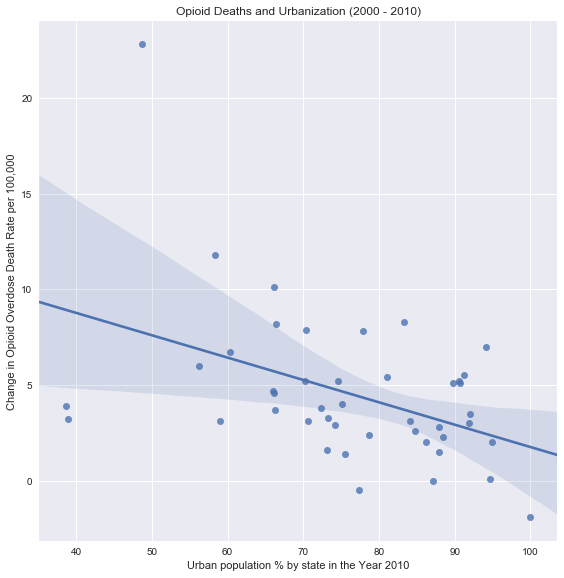

In [84]:
# scatterplot: Urban population % by state in year 2010 on change in opioid death rates from years 2000-2010 

sns.lmplot(x='2010', y='Change in Death', data = OpDeathsDelta_df, size = 8)

# set titles and labels
plt.title('Opioid Deaths and Urbanization (2000 - 2010)')
plt.xlabel('Urban population % by state in the Year 2010')
plt.ylabel('Change in Opioid Overdose Death Rate per 100,000')
plt.show()

#### - Crime and opioids

In [85]:
#importing crime data
csv_violent1999 = "Data Files\ViolentCrimeState1999.csv"
csv_violent2014 = r'Data Files\ViolentCrimeState2014.csv'
csv_property1999 = 'Data Files\PropertyCrimeState1999.csv'
csv_property2014 = r'Data Files\PropertyCrimeStates2014.csv'

# Read in the csv files, skipping titles (skipfooter isn't working for some reason)
violent1999_df = pd.read_csv(csv_violent1999, skiprows=9)
violent2014_df = pd.read_csv(csv_violent2014, skiprows=9)
property1999_df = pd.read_csv(csv_property1999, skiprows=9)
property2014_df = pd.read_csv(csv_property2014, skiprows=9)

#clean up footers or any row with 4 null values. Also adds year as suffix to distinguish values when merge later
violent1999_df = violent1999_df.dropna(thresh=4).add_suffix('_1999')
violent2014_df = violent2014_df.dropna(thresh=4).add_suffix('_2014')
property1999_df = property1999_df.dropna(thresh=4).add_suffix('_1999')
property2014_df = property2014_df.dropna(thresh=4).add_suffix('_2014')

#removes year from State column 
violent1999_df = violent1999_df.rename(columns={'State_1999':'State'})
violent2014_df = violent2014_df.rename(columns={'State_2014':'State'})
property1999_df = property1999_df.rename(columns={'State_1999':'State'})
property2014_df = property2014_df.rename(columns={'State_2014':'State'})

# change values as numeric
violent1999_df = violent1999_df.apply(pd.to_numeric, errors='ignore')  
violent2014_df = violent2014_df.apply(pd.to_numeric, errors='ignore')  
property1999_df = property1999_df.apply(pd.to_numeric, errors='ignore')
property2014_df = property2014_df.apply(pd.to_numeric, errors='ignore')

#drop US total value
violent1999_df = violent1999_df[:-1] #US total is at the last row for each of the crime df
violent2014_df = violent2014_df[:-1]
property1999_df = property1999_df[:-1]
property2014_df = property2014_df[:-1]

property2014_df.tail()

,State,Population_2014,Property crime rate_2014,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014,Unnamed: 6_2014
46,Virginia,8326289,1930.3,277.7,1560.5,92.1,NaN
47,Washington,7061530,3706.1,783.0,2489.1,434.0,NaN
48,West Virginia,1850326,2034.7,484.9,1447.3,102.5,NaN
49,Wisconsin,5757564,2088.3,368.5,1547.6,172.3,NaN
50,Wyoming,584153,1964.7,289.1,1572.4,103.2,NaN


In [86]:
# Crime dataframes for each crime type
violent_df = violent1999_df.merge(violent2014_df, on='State')
property_df = property1999_df.merge(property2014_df, on='State')

# get change in violent crimes, as well as change in robbery rates 
violent_df['Violent Crime rate_change'] = violent_df['Violent Crime rate_2014'] - violent_df['Violent Crime rate_1999']
violent_df['Robbery rate_change'] = violent_df['Robbery rate_2014'] - violent_df['Robbery rate_1999']

#get change in property crime rates
property_df['Property crime rate_change'] = property_df['Property crime rate_2014']\
                                            - property_df['Property crime rate_1999']

property_df.tail()

,State,Population_1999,Property crime rate_1999,Burglary rate_1999,Larceny-theft rate_1999,Motor vehicle theft rate_1999,Unnamed: 6_1999,Population_2014,Property crime rate_2014,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014,Unnamed: 6_2014,Property crime rate_change
46,Virginia,6872912,3059.3,471.6,2326.5,261.2,NaN,8326289,1930.3,277.7,1560.5,92.1,NaN,-1129.0
47,Washington,5756361,4878.0,949.4,3341.2,587.3,NaN,7061530,3706.1,783.0,2489.1,434.0,NaN,-1171.9
48,West Virginia,1806928,2370.0,570.2,1591.7,208.2,NaN,1850326,2034.7,484.9,1447.3,102.5,NaN,-335.3
49,Wisconsin,5250446,3050.3,488.2,2298.9,263.2,NaN,5757564,2088.3,368.5,1547.6,172.3,NaN,-962.0
50,Wyoming,479602,3225.2,489.8,2611.1,124.3,NaN,584153,1964.7,289.1,1572.4,103.2,NaN,-1260.5


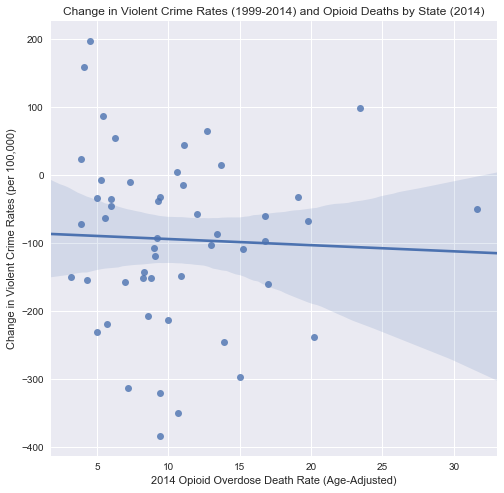

In [104]:
# Scatterplot of change in violent crime and opioid deaths in 2014
plt.figure(figsize=(8,8))
# scatter with regression line. 
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=violent_df['Violent Crime rate_change'])
            #For some reason sns.lmplot doesn't work with data from two df's but sns.regplot does.

# set title and labels
plt.title('Change in Violent Crime Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Violent Crime Rates (per 100,000)')
plt.show()

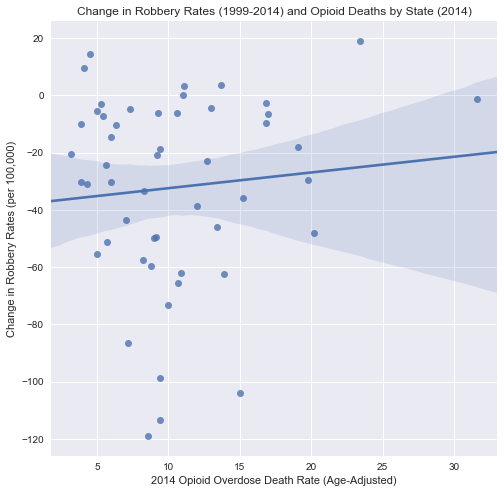

In [106]:
# Scatterplot of change in robbery rates and opioid deaths in 2014
plt.figure(figsize=(8,8))
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=violent_df['Robbery rate_change'])

# set title and labels
plt.title('Change in Robbery Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Robbery Rates (per 100,000)')
plt.show()

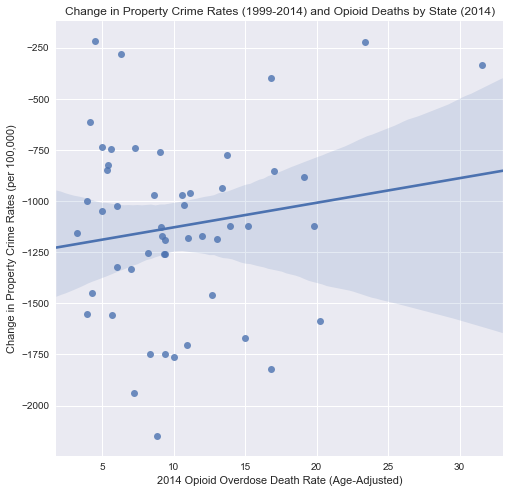

In [107]:
# Scatterplot of change in property crime rates and opioid deaths in 2014
plt.figure(figsize=(8,8))
sns.regplot(x=OpDeaths_Urb_df['2014__Opioid Overdose Death Rate (Age-Adjusted)'],\
           y=property_df['Property crime rate_change'])

# set title and labels
plt.title('Change in Property Crime Rates (1999-2014) and Opioid Deaths by State (2014)')
plt.xlabel('2014 Opioid Overdose Death Rate (Age-Adjusted)')
plt.ylabel('Change in Property Crime Rates (per 100,000)')
plt.show()

#### Research Question 4